In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import json

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model  import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

### Problem statement

By Using Linear regression models we can predict the amount of
CO2 emitted by cars per unit volume and weight.

### Data gathring 

In [62]:
df = pd.read_csv(r"E:\Priti\DATA set\CO2 emission of cars dataset.csv")
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2', 'Unnamed: 5'], dtype='object')

In [63]:
df = pd.read_csv(r"E:\Priti\DATA set\CO2 emission of cars dataset.csv")
df

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN
5,VW,Up!,1000,929,105,NaN
6,Skoda,Fabia,1400,1109,90,NaN
7,Mercedes,A-Class,1500,1365,92,NaN
8,Ford,Fiesta,1500,1112,98,NaN
9,Audi,A1,1600,1150,99,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [65]:
df.drop("Unnamed: 5",axis=1,inplace=True)

In [66]:
df

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [67]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### EDA and feature engg.

In [68]:
df["Car"]

0         Toyota
1     Mitsubishi
2          Skoda
3           Fiat
4           Mini
5             VW
6          Skoda
7       Mercedes
8           Ford
9           Audi
10       Hyundai
11        Suzuki
12          Ford
13         Honda
14        Hundai
15          Opel
16           BMW
17         Mazda
18         Skoda
19          Ford
20          Ford
21          Opel
22      Mercedes
23         Skoda
24         Volvo
25      Mercedes
26          Audi
27          Audi
28         Volvo
29           BMW
30      Mercedes
31         Volvo
32          Ford
33           BMW
34          Opel
35      Mercedes
Name: Car, dtype: object

In [69]:
df["Car"].value_counts()

Car
Mercedes      5
Ford          5
Skoda         4
Audi          3
BMW           3
Opel          3
Volvo         3
VW            1
Mitsubishi    1
Hyundai       1
Suzuki        1
Honda         1
Hundai        1
Mini          1
Fiat          1
Mazda         1
Toyota        1
Name: count, dtype: int64

In [70]:
df['Car'].replace({'Mercedes':1,'Ford':2,'Skoda':3,'Audi':4,'BMW':5,'Opel':6,'Volvo':7,'VW':8,'Mitsubishi':9,'Hyundai':10, 
 'Suzuki':11,'Honda':12,'Hundai':13,'Mini':14,'Fiat':15,'Mazda':16,'Toyota':17},inplace = True)  

In [71]:
Car_labels={'Mercedes':1,'Ford':2,'Skoda':3,'Audi':4,'BMW':5,'Opel':6,'Volvo':7,'VW':8,'Mitsubishi':9,'Hyundai':10, 
 'Suzuki':11,'Honda':12,'Hundai':13,'Mini':14,'Fiat':15,'Mazda':16,'Toyota':17}

In [72]:
df

,Car,Model,Volume,Weight,CO2
0,17,Aygo,1000,790,99
1,9,Space Star,1200,1160,95
2,3,Citigo,1000,929,95
3,15,500,900,865,90
4,14,Cooper,1500,1140,105
5,8,Up!,1000,929,105
6,3,Fabia,1400,1109,90
7,1,A-Class,1500,1365,92
8,2,Fiesta,1500,1112,98
9,4,A1,1600,1150,99


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     int64 
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [74]:
df['Model'].value_counts()

Model
Fiesta        2
Aygo          1
A6            1
Insignia      1
C-Class       1
Octavia       1
S60           1
CLA           1
A4            1
V70           1
Focus         1
5             1
E-Class       1
XC70          1
B-Max         1
2             1
Zafira        1
Mondeo        1
Rapid         1
Space Star    1
3             1
1             1
Astra         1
I30           1
Civic         1
Swift         1
I20           1
A1            1
A-Class       1
Fabia         1
Up!           1
Cooper        1
500           1
Citigo        1
SLK           1
Name: count, dtype: int64

In [75]:
df['Model'].value_counts().to_dict()

{'Fiesta': 2,
 'Aygo': 1,
 'A6': 1,
 'Insignia': 1,
 'C-Class': 1,
 'Octavia': 1,
 'S60': 1,
 'CLA': 1,
 'A4': 1,
 'V70': 1,
 'Focus': 1,
 '5': 1,
 'E-Class': 1,
 'XC70': 1,
 'B-Max': 1,
 '2': 1,
 'Zafira': 1,
 'Mondeo': 1,
 'Rapid': 1,
 'Space Star': 1,
 '3': 1,
 '1': 1,
 'Astra': 1,
 'I30': 1,
 'Civic': 1,
 'Swift': 1,
 'I20': 1,
 'A1': 1,
 'A-Class': 1,
 'Fabia': 1,
 'Up!': 1,
 'Cooper': 1,
 '500': 1,
 'Citigo': 1,
 'SLK': 1}

In [76]:
df['Model'].replace({'Fiesta':1,'Aygo':2,'A6':3,'Insignia':4,'C-Class':5,'Octavia':6,
'S60':7,'CLA':8,'A4':9,'V70':10,'Focus':11,'E-Class':12,'XC70':13,'B-Max':14,
'Zafira':15,'Mondeo':16,'Rapid':17,'Space Star':18,'Astra':19,'I30':20,'Civic':21,
'Swift':22,'I20':23,'A1':24,'A-Class':25,'Fabia':26,'Up!':27,'Cooper':28,'Citigo':29,'SLK':30,'500':31,'1':32,'2':33,'3':34,'5':35},inplace=True)

In [78]:
Model_labels ={'Fiesta':1,'Aygo':2,'A6':3,'Insignia':4,'C-Class':5,'Octavia':6,
'S60':7,'CLA':8,'A4':9,'V70':10,'Focus':11,'E-Class':12,'XC70':13,'B-Max':14,
'Zafira':15,'Mondeo':16,'Rapid':17,'Space Star':18,'Astra':19,'I30':20,'Civic':21,
'Swift':22,'I20':23,'A1':24,'A-Class':25,'Fabia':26,'Up!':27,'Cooper':28,'Citigo':29,'SLK':30,'500':31,'1':32,'2':33,'3':34,'5':35}

In [79]:
df

,Car,Model,Volume,Weight,CO2
0,17,2,1000,790,99
1,9,18,1200,1160,95
2,3,29,1000,929,95
3,15,31,900,865,90
4,14,28,1500,1140,105
5,8,27,1000,929,105
6,3,26,1400,1109,90
7,1,25,1500,1365,92
8,2,1,1500,1112,98
9,4,24,1600,1150,99


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Car     36 non-null     int64
 1   Model   36 non-null     int64
 2   Volume  36 non-null     int64
 3   Weight  36 non-null     int64
 4   CO2     36 non-null     int64
dtypes: int64(5)
memory usage: 1.5 KB


In [81]:
df.isna().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

### Target column

In [82]:
df["CO2"]

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64

In [83]:
df["CO2"].value_counts()

CO2
99     9
104    4
105    3
94     2
109    2
114    2
95     2
97     2
90     2
101    1
98     1
102    1
92     1
115    1
117    1
108    1
120    1
Name: count, dtype: int64

<Axes: xlabel='CO2', ylabel='count'>

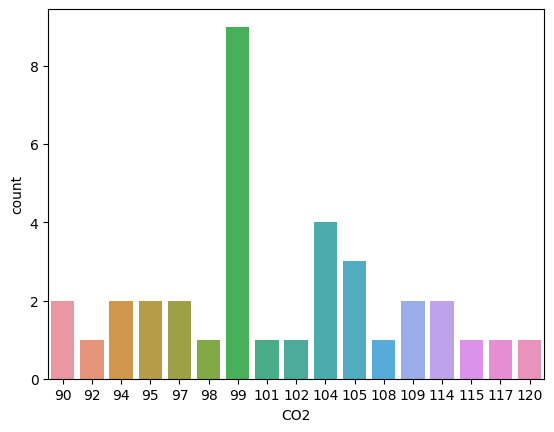

In [84]:
sns.countplot(x=df['CO2'])

### feature selection

In [85]:
df.corr()['CO2']

Car      -0.180535
Model    -0.015905
Volume    0.592082
Weight    0.552150
CO2       1.000000
Name: CO2, dtype: float64

<Axes: >

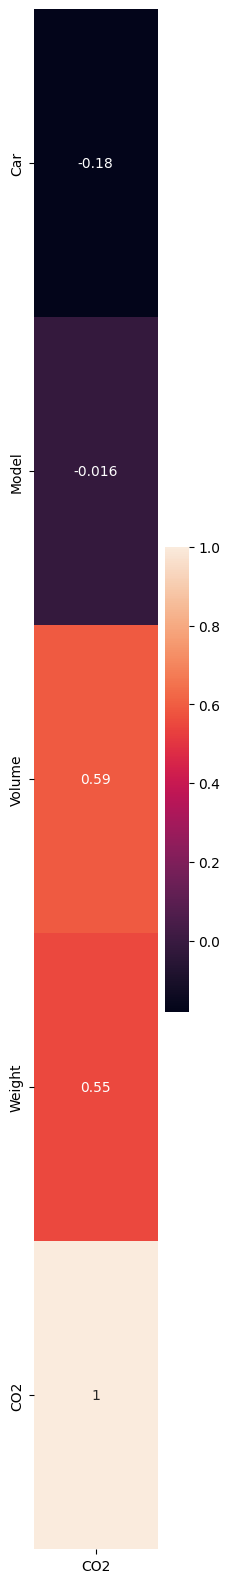

In [86]:
plt.figure(figsize = (2,20))
sns.heatmap(df.corr()[['CO2']],annot = True)

In [87]:
df.corr(method='pearson').head()

,Car,Model,Volume,Weight,CO2
Car,1.000000,0.267001,-0.310088,-0.426080,-0.180535
Model,0.267001,1.000000,-0.084809,-0.187458,-0.015905
Volume,-0.310088,-0.084809,1.000000,0.753537,0.592082
Weight,-0.426080,-0.187458,0.753537,1.000000,0.552150
CO2,-0.180535,-0.015905,0.592082,0.552150,1.000000


In [88]:
df.corr(method = 'spearman').head()

,Car,Model,Volume,Weight,CO2
Car,1.000000,0.271184,-0.257412,-0.322366,-0.083671
Model,0.271184,1.000000,-0.103878,-0.233840,-0.027795
Volume,-0.257412,-0.103878,1.000000,0.740547,0.522436
Weight,-0.322366,-0.233840,0.740547,1.000000,0.473675
CO2,-0.083671,-0.027795,0.522436,0.473675,1.000000


In [89]:
df.corr(method = 'kendall').head()

,Car,Model,Volume,Weight,CO2
Car,1.000000,0.209761,-0.189237,-0.220471,-0.063198
Model,0.209761,1.000000,-0.126433,-0.175580,-0.003314
Volume,-0.189237,-0.126433,1.000000,0.599914,0.416999
Weight,-0.220471,-0.175580,0.599914,1.000000,0.361017
CO2,-0.063198,-0.003314,0.416999,0.361017,1.000000


In [90]:
df.corr(method = 'kendall')['CO2']

Car      -0.063198
Model    -0.003314
Volume    0.416999
Weight    0.361017
CO2       1.000000
Name: CO2, dtype: float64

### model training

In [91]:
df

,Car,Model,Volume,Weight,CO2
0,17,2,1000,790,99
1,9,18,1200,1160,95
2,3,29,1000,929,95
3,15,31,900,865,90
4,14,28,1500,1140,105
5,8,27,1000,929,105
6,3,26,1400,1109,90
7,1,25,1500,1365,92
8,2,1,1500,1112,98
9,4,24,1600,1150,99


#### train test split

In [92]:
x = df.drop(['CO2'],axis = 1)
y = df['CO2']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=3)

In [93]:
x_test.shape

(8, 4)

In [94]:
linear_reg =LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### Model evaluation

In [95]:
linear_reg.predict(x_test)[5:10]

array([102.37493315, 102.5281273 , 108.16076897])

In [96]:
y_test[5:10]

23     99
15     97
27    114
Name: CO2, dtype: int64

#### testing data evaluation

In [97]:
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("mean square error :",mse)

rmse = np.sqrt(mse)
print("Root mean square error :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error :",mae)

r2_value = r2_score(y_test,y_pred)
print("r-squared value    :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1-((1 - r2_value)*(n-1))/(n-k-1)
print (" adjusted r squared value :",adj_r2)

mean square error : 25.684768506188675
Root mean square error : 5.068014256707323
mean absolute error : 4.772165378491222
r-squared value    : -0.05103912045784864
 adjusted r squared value : -1.452424614401647


#### training data evalution

In [98]:
y_pred_train = linear_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("mean square error :",mse)

rmse = np.sqrt(mse)
print("Root mean square error :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolute error :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("r-squared value    :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1-((1 - r2_value)*(n-1))/(n-k-1)
print (" adjusted r squared value :",adj_r2)

mean square error : 36.33623643505694
Root mean square error : 6.027954581369782
mean absolute error : 5.295678169935499
r-squared value    : 0.4132919500548936
 adjusted r squared value : 0.3112557674557447


In [99]:
df.shape

(36, 5)

In [100]:
x.shape

(36, 4)

### Single row testing

In [101]:
x.head(1).T   

,0
Car,17
Model,2
Volume,1000
Weight,790


In [102]:
x_test[1:2]

,Car,Model,Volume,Weight
26,4,9,2000,1490


In [103]:
linear_reg.predict(x_test[1:2])[0]

107.092347805361

In [104]:
column_names = x.columns.tolist()
column_names

['Car', 'Model', 'Volume', 'Weight']

In [105]:
Car = 20
volume =1400
weight =929

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = Car
test_array[0,1] = volume
test_array[0,2] = weight

CO2_emission = np.around(linear_reg.predict(test_array)[0],3)
CO2_emission

133.336

In [106]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [107]:
project_data = {'Car':Car_labels,'Model':Model_labels,"Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)